In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/momoogu/smokers.csv


In [6]:
path = "../input/momoogu/smokers.csv"


Загрузка данных

In [14]:
data = pd.read_csv(path,delimiter=';').iloc[:,:6]
data

,holest,age,sex,SBP,DBP,count
0,199,58,m,125,65,20
1,225,58,m,126,80,40
2,161,57,m,126,78,5
3,232,56,m,128,78,0
4,232,56,m,128,82,40
...,...,...,...,...,...,...
431,250,51,f,110,80,0
432,196,53,f,110,80,0
433,276,50,f,110,75,20
434,213,51,f,110,78,0


Статистики для всех

In [15]:
data.describe()

,holest,age,SBP,DBP,count
count,436.000000,436.000000,436.000000,436.000000,436.000000
mean,227.041284,52.555046,145.715596,88.392202,7.616972
std,43.518136,5.740695,26.340334,13.369715,10.690530
min,96.000000,45.000000,90.000000,52.000000,0.000000
25%,198.000000,47.000000,130.000000,80.000000,0.000000
50%,224.500000,54.500000,140.000000,86.000000,0.000000
75%,250.000000,58.000000,160.000000,95.000000,16.250000
max,363.000000,62.000000,300.000000,150.000000,50.000000


Статистики для группы 'мужчины'

In [16]:
data[data.sex=='m'].describe()

,holest,age,SBP,DBP,count
count,218.000000,218.000000,218.000000,218.000000,218.000000
mean,225.174312,57.977064,151.389908,89.564220,10.536697
std,42.664341,1.918723,26.117058,14.239169,12.186002
min,96.000000,55.000000,98.000000,52.000000,0.000000
25%,194.250000,56.000000,135.000000,80.000000,0.000000
50%,224.500000,58.000000,146.500000,88.000000,5.000000
75%,250.000000,60.000000,160.000000,96.000000,20.000000
max,340.000000,62.000000,276.000000,138.000000,50.000000


Статистики для группы 'женщины'

In [17]:
data[data.sex=='f'].describe()

,holest,age,SBP,DBP,count
count,218.000000,218.000000,218.000000,218.000000,218.000000
mean,228.908257,47.133028,140.041284,87.220183,4.697248
std,44.374930,1.820445,25.377757,12.361571,7.967104
min,140.000000,45.000000,90.000000,60.000000,0.000000
25%,199.250000,45.000000,124.000000,80.000000,0.000000
50%,224.500000,47.000000,135.000000,86.000000,0.000000
75%,255.750000,49.000000,150.000000,94.000000,5.000000
max,363.000000,54.000000,300.000000,150.000000,35.000000


Ассиметрия для группы 'мужчины'

In [19]:
data[data.sex=='m'].skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


holest    0.453046
age       0.670309
SBP       1.800484
DBP       0.904974
count     1.641099
dtype: float64

Ассиметрия для группы 'женщины'

In [20]:
data[data.sex=='f'].skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


holest    0.453046
age       0.670309
SBP       1.800484
DBP       0.904974
count     1.641099
dtype: float64

Эксцесс в группе 'мужчины'

In [32]:
data[data.sex=='m'].kurt()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


holest    0.042521
age      -1.168240
SBP       4.022000
DBP       1.092019
count     0.397172
dtype: float64

Эксцесс в группе 'женщины'

In [33]:
data[data.sex=='f'].kurt()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


holest    0.027687
age       0.381299
SBP       7.648498
DBP       2.444740
count     1.619760
dtype: float64

Блочная диаграмма. Холестирин у мужчин.

<AxesSubplot:title={'center':'мужчины'}>

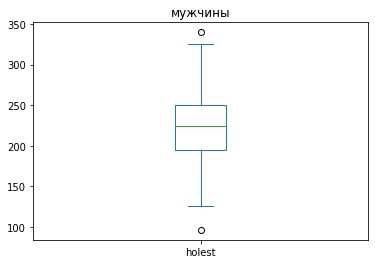

In [29]:
data[data.sex=='m'].holest.plot.box(title='мужчины')

Блочная диаграмма. Холестирин у женщин.

<AxesSubplot:title={'center':'женщины'}>

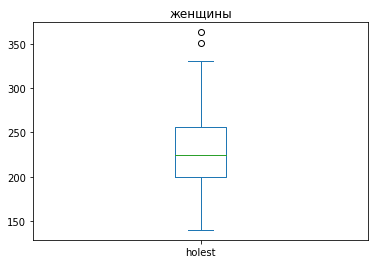

In [30]:
data[data.sex=='f'].holest.plot.box(title='женщины')

Парная корреляция в группе 'мужчины'

In [35]:
data[data.sex=='m'].corr()

,holest,age,SBP,DBP,count
holest,1.000000,0.003483,0.056697,0.081974,0.018858
age,0.003483,1.000000,-0.031179,-0.109836,-0.098411
SBP,0.056697,-0.031179,1.000000,0.723057,-0.107766
DBP,0.081974,-0.109836,0.723057,1.000000,-0.042971
count,0.018858,-0.098411,-0.107766,-0.042971,1.000000


In [ ]:
повышенная связанность между параметрами SBP и DBP

Парная корреляция в группе 'женщины'

In [36]:
data[data.sex=='f'].corr()

,holest,age,SBP,DBP,count
holest,1.000000,0.108596,0.275101,0.250302,-0.010741
age,0.108596,1.000000,0.018434,0.065246,0.070467
SBP,0.275101,0.018434,1.000000,0.814809,-0.111255
DBP,0.250302,0.065246,0.814809,1.000000,-0.089487
count,-0.010741,0.070467,-0.111255,-0.089487,1.000000


повышенная связанность между параметрами SBP и DBP

Гистограмма для количества в группе 'мужчины'

<AxesSubplot:>

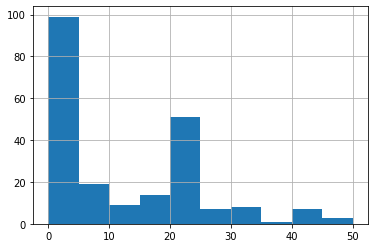

In [44]:
data[data.sex=='m']['count'].hist(bins=10)

Гистограмма для количества в группе 'женщины'

<AxesSubplot:>

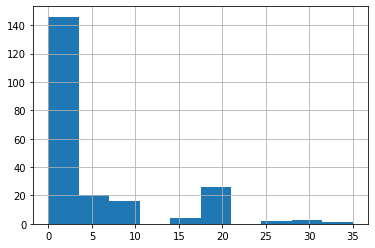

In [53]:
data[data.sex=='f']['count'].hist(bins=10)